<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/ML-Gene-Mutation/blob/main/ML_Gene_Mutations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, Flatten


In [ ]:
# Load dataset
file_path = "cancer_gene_mutations.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


  Gene Name Mutation Type Cancer Type  Mutation Frequency
0      PTEN  Substitution  Pancreatic                  97
1      EGFR      Deletion        Lung                  18
2       ALK      Deletion        Lung                  63
3      KRAS  Substitution      Breast                  92
4      PTEN  Substitution        Lung                  47


In [ ]:
# Initialize label encoders
gene_encoder = LabelEncoder()
mutation_encoder = LabelEncoder()
cancer_encoder = LabelEncoder()

# Encode categorical features
df["Gene Name"] = gene_encoder.fit_transform(df["Gene Name"])
df["Mutation Type"] = mutation_encoder.fit_transform(df["Mutation Type"])
df["Cancer Type"] = cancer_encoder.fit_transform(df["Cancer Type"])

# Scale Mutation Frequency
scaler = MinMaxScaler()
df["Mutation Frequency"] = scaler.fit_transform(df[["Mutation Frequency"]])


In [ ]:
# Define features and labels
X = df.drop(columns=["Cancer Type"])  # Features
y = df["Cancer Type"]  # Target variable

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define MLP Model
mlp_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(len(np.unique(y)), activation="softmax")  # Output layer
])

# Compile Model
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train Model
mlp_history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1155 - loss: 2.1181 - val_accuracy: 0.1250 - val_loss: 2.0932
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1330 - loss: 2.0805 - val_accuracy: 0.1200 - val_loss: 2.0830
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1601 - loss: 2.0764 - val_accuracy: 0.1100 - val_loss: 2.0844
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1499 - loss: 2.0751 - val_accuracy: 0.1000 - val_loss: 2.0896
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1813 - loss: 2.0697 - val_accuracy: 0.1100 - val_loss: 2.0863
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1413 - loss: 2.0769 - val_accuracy: 0.1000 - val_loss: 2.0896
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1686 - loss: 2.0638 - val_accuracy: 0.1550 - val_loss: 2.0796
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1539 - loss: 2.0706 - val_accuracy: 0.1300 - val_loss: 2.0823
Epo

In [ ]:
# Define CNN Model
cnn_model = Sequential([
    Embedding(input_dim=len(df["Gene Name"].unique()) + 1, output_dim=16, input_length=X_train.shape[1]),
    Conv1D(filters=32, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(len(np.unique(y)), activation="softmax")  # Output layer
])

# Compile Model
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1063 - loss: 2.0801 - val_accuracy: 0.1250 - val_loss: 2.0778
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1589 - loss: 2.0757 - val_accuracy: 0.1400 - val_loss: 2.0773
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1764 - loss: 2.0719 - val_accuracy: 0.1250 - val_loss: 2.0777
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1575 - loss: 2.0713 - val_accuracy: 0.1300 - val_loss: 2.0756
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1698 - loss: 2.0597 - val_accuracy: 0.1350 - val_loss: 2.0767
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1683 - loss: 2.0612 - val_accuracy: 0.1450 - val_loss: 2.0757
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1849 - loss: 2.0563 - val_accuracy: 0.1500 - val_loss: 2.0747
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1514 - loss: 2.0520 - val_accuracy: 0.1500 - val_loss: 2.0774
Epo

In [ ]:
# Evaluate MLP Model
mlp_loss, mlp_acc = mlp_model.evaluate(X_test, y_test)
print(f"MLP Test Accuracy: {mlp_acc:.4f}")

# Evaluate CNN Model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0846 - loss: 2.1405 
MLP Test Accuracy: 0.0850
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1263 - loss: 2.0972 
CNN Test Accuracy: 0.1150


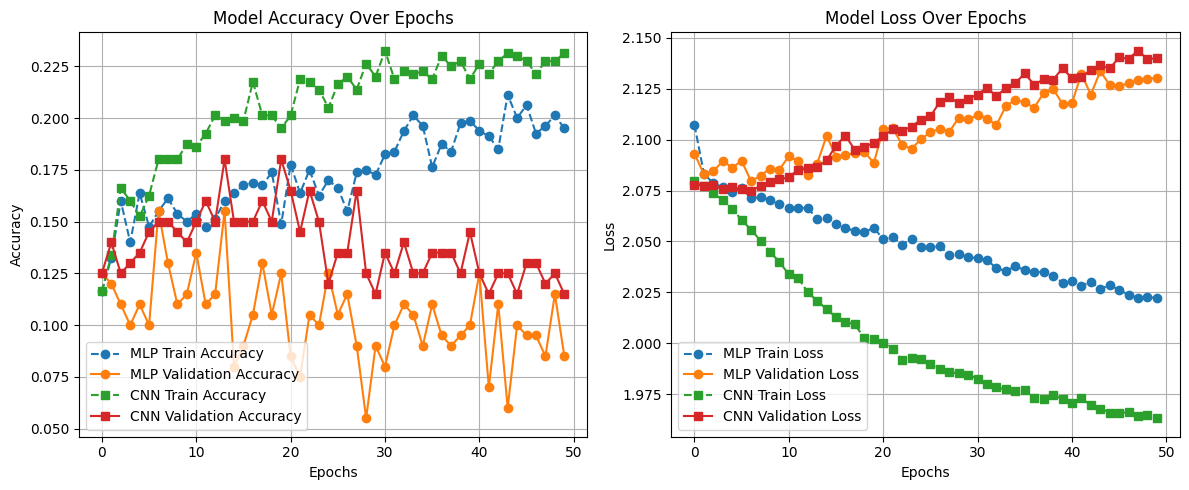

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation metrics from history objects
mlp_train_acc = mlp_history.history['accuracy']
mlp_val_acc = mlp_history.history['val_accuracy']
mlp_train_loss = mlp_history.history['loss']
mlp_val_loss = mlp_history.history['val_loss']

cnn_train_acc = cnn_history.history['accuracy']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp_train_acc, label="MLP Train Accuracy", linestyle="dashed", marker="o")
plt.plot(mlp_val_acc, label="MLP Validation Accuracy", linestyle="solid", marker="o")
plt.plot(cnn_train_acc, label="CNN Train Accuracy", linestyle="dashed", marker="s")
plt.plot(cnn_val_acc, label="CNN Validation Accuracy", linestyle="solid", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(mlp_train_loss, label="MLP Train Loss", linestyle="dashed", marker="o")
plt.plot(mlp_val_loss, label="MLP Validation Loss", linestyle="solid", marker="o")
plt.plot(cnn_train_loss, label="CNN Train Loss", linestyle="dashed", marker="s")
plt.plot(cnn_val_loss, label="CNN Validation Loss", linestyle="solid", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()